In [1]:
# Import all the libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from collections import defaultdict
from datetime import datetime
from statistics import mean
from matplotlib import pyplot
from scipy.stats import pearsonr
from pylab import *            
from sklearn.naive_bayes import GaussianNB as GNB, MultinomialNB as MNB, ComplementNB as CNB, BernoulliNB as BNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_validate, cross_val_score as cvscore
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

## Data preprocessing

In [2]:
df=pd.read_csv('flights.csv')

In [3]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# This step showes the percentages of missing values in each attributes. 
print(df.isnull().sum()/df.shape[0]*100)
# And the outcome suggests that CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY,
# LATE_AIRCRAFT_DELAY and WEATHER_DELAY have a great proportion of missing values which makes analyzing 
# of those attributes mpossible. Therefore, they will not be included in the model.

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

In [5]:
# Year will not be included in the final model, cuz they all come from the same year.
print("YEAR:\n",df['YEAR'].unique(),"\n")

# AirLine
print('AIRLINES:\n',df["AIRLINE"].unique(),"\n")

# A tail number refers to an identification number painted on an aircraft, frequently on the tail---google
print("TAIL:\n", df['TAIL_NUMBER'].unique(),'\n')
# Tail_number contributes nothing towards the model, they will be excluded.

# To check if the taxi out and wheels off refer to similar circumstances
df['test2']=df['TAXI_OUT']-df['WHEELS_OFF']
print(df['test2'].describe(),'\n')
# It turns out the std is too big such that they could have different meanings

# Check if the flight numbers would affect the model
print('Flight number:\n',df['FLIGHT_NUMBER'].unique())
print("Len of unique flight number:",len(list(df['FLIGHT_NUMBER'].unique())),'\n')
# flight numebr doesnot have a valid meaning which means it would not contribute to the model

# Taxi-out time is defined as the time between the actual pushback 
# and wheels-off. Taxi-out time is difficult to predict in hub 
# airports at peak hours.---google
print('taxi out time:\n',list(df['TAXI_OUT'].head(20)),'\n')
# Taxi-out could be useful, leave it as this stage

# To check the proportion of the missing values in the entire dataset
print('% of missing values:', (df.shape[0]-df.dropna().shape[0])/df.shape[0])
# It turns out the missing values only take a small amount of records in the set. 
# Therefore, drop them will have litte effect to the model

YEAR:
 [2015] 

AIRLINES:
 ['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX'] 

TAIL:
 ['N407AS' 'N3KUAA' 'N171US' ... 'N7LEAA' 'N850DN' 'N8676A'] 

count    5.730032e+06
mean    -1.341099e+03
std      4.977409e+02
min     -2.394000e+03
25%     -1.740000e+03
50%     -1.328000e+03
75%     -9.180000e+02
max      1.540000e+02
Name: test2, dtype: float64 

Flight number:
 [  98 2336  840 ... 6777 6895 6887]
Len of unique flight number: 6952 

taxi out time:
 [21.0, 12.0, 16.0, 15.0, 11.0, 18.0, 11.0, 13.0, 17.0, 12.0, 12.0, 21.0, 18.0, 18.0, 28.0, 17.0, 25.0, 11.0, 11.0, 9.0] 

% of missing values: 1.0


In [3]:
#Read in the useful columns
usecols=['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','ARRIVAL_DELAY']
ndf=pd.read_csv('flights.csv',usecols=usecols,low_memory=False)

In [4]:
ndf = ndf.dropna()

In [8]:
ndf

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,...,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,...,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,...,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,...,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0


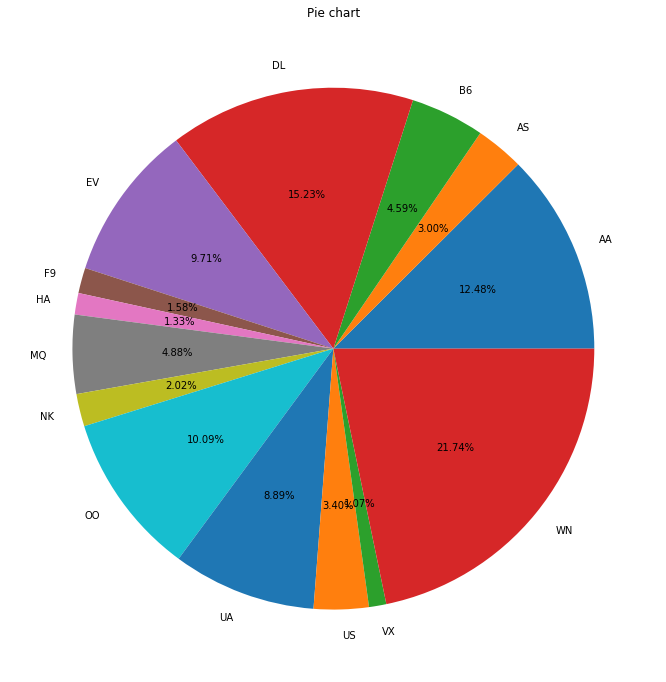

In [9]:
X = ndf.groupby(ndf["AIRLINE"]).count().YEAR         # creat pie chart of all airports
labels=X.index                                       # check the distribution of all airlines
fig = plt.figure(figsize=(12,12))
plt.pie(X,labels=labels,autopct='%1.2f%%')       
plt.title("Pie chart")
plt.show()  

## Date cleaning

Text(0, 0.5, 'Number of records')

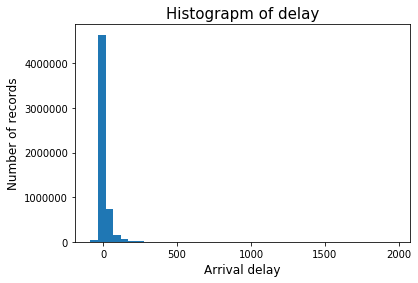

In [10]:
# The target attribute is ARRIVAL_DELAY
# Find the distribution of this attribute

plt.hist(ndf['ARRIVAL_DELAY'],bins =40)    
plt.title("Histograpm of delay",fontsize=15)          
plt.xlabel("Arrival delay",fontsize=12)
plt.ylabel("Number of records",fontsize=12)

In [5]:
r = list(ndf[ndf['ARRIVAL_DELAY'] >250].index)      # Delete the arrival delay which over 250
ndf = ndf.drop(index = r) 

In [6]:
r1 = list(ndf[ndf['ARRIVAL_DELAY'] < -50].index)  # Delete the arrival delay which smaller than -50
ndf = ndf.drop(index = r1)

Text(0, 0.5, 'Number of records')

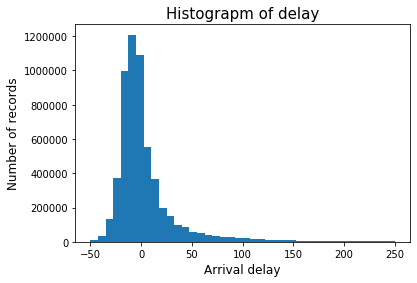

In [13]:
plt.hist(ndf['ARRIVAL_DELAY'],bins =40)         # distribution still not good for analysis
plt.title("Histograpm of delay",fontsize=15)          
plt.xlabel("Arrival delay",fontsize=12)
plt.ylabel("Number of records",fontsize=12)

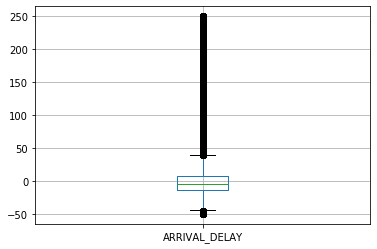

In [14]:
dd = ndf.loc[:,['ARRIVAL_DELAY']].copy()     # use boxplot to find outlier
dd.boxplot()

In [15]:
po = ndf[ndf["ARRIVAL_DELAY"]>0].copy()   # all records with positive arrival delay
ne = ndf[ndf["ARRIVAL_DELAY"]<0].copy()   # all records with negative arrival delay

In [16]:
po.describe().ARRIVAL_DELAY   

count    2.067765e+06
mean     3.001858e+01
std      3.934909e+01
min      1.000000e+00
25%      6.000000e+00
50%      1.500000e+01
75%      3.700000e+01
max      2.500000e+02
Name: ARRIVAL_DELAY, dtype: float64

In [7]:
IQR =  37-6
big = 1.5*IQR+37

In [8]:
r = list(ndf[ndf['ARRIVAL_DELAY'] > big].index)    # use IQR menthod to find outlier
ndf = ndf.drop(index = r)

Text(0, 0.5, 'Number of records')

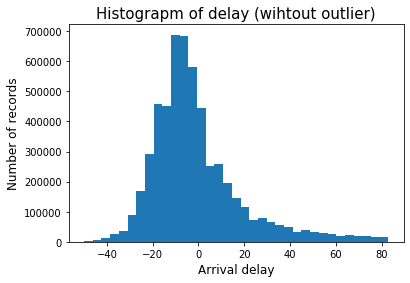

In [19]:
plt.hist(ndf['ARRIVAL_DELAY'],bins =35)                            # good now
plt.title("Histograpm of delay (wihtout outlier)",fontsize=15)         
plt.xlabel("Arrival delay",fontsize=12)
plt.ylabel("Number of records",fontsize=12)

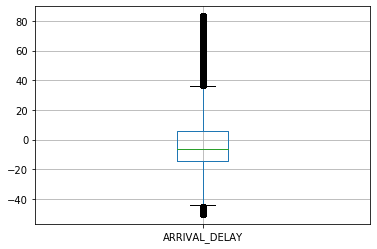

In [20]:
dd = ndf.loc[:,['ARRIVAL_DELAY']].copy()      # check boxplot again
dd.boxplot()

## Exploratory data analysis (all airlines)

In [9]:
ndf['trip_speed'] = ndf.DISTANCE/ndf.AIR_TIME         # creat a new attribute called trip_speed 
ndf['take_off_hours'] = (ndf.WHEELS_OFF/100).apply(lambda x:int(x))   # creat a new attribute called take_off_hours 
ndf['delay'] = (ndf.ARRIVAL_DELAY>0)*1                # if flight delay, the value is 1, otherwise is 0

In [10]:
po = ndf[ndf["ARRIVAL_DELAY"]>0].copy() 
ne = ndf[ndf["ARRIVAL_DELAY"]<0].copy()
ndf

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,trip_speed,take_off_hours,delay
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,...,169.0,1448,404.0,4.0,430,408.0,-22.0,8.568047,0,0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,...,263.0,2330,737.0,4.0,750,741.0,-9.0,8.859316,0,0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,...,266.0,2296,800.0,11.0,806,811.0,5.0,8.631579,0,1
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,...,258.0,2342,748.0,8.0,805,756.0,-9.0,9.077519,0,0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,...,199.0,1448,254.0,5.0,320,259.0,-21.0,7.276382,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,...,272.0,2611,749.0,4.0,819,753.0,-26.0,9.599265,0,0
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,...,195.0,1617,427.0,3.0,446,430.0,-16.0,8.292308,0,0
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,...,197.0,1598,424.0,8.0,440,432.0,-8.0,8.111675,0,0
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,...,144.0,1189,327.0,3.0,340,330.0,-10.0,8.256944,0,0


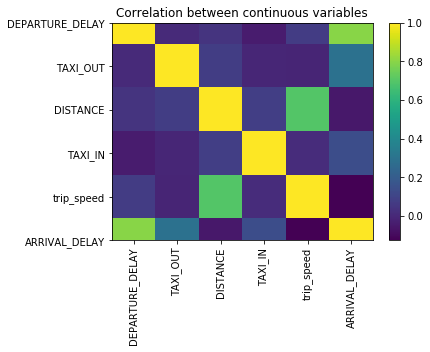

In [23]:
# Find coorealation between all continuous variables
continuous_variables=['DEPARTURE_DELAY','TAXI_OUT','DISTANCE','TAXI_IN','trip_speed','ARRIVAL_DELAY']
cor_mat = ndf[continuous_variables].corr()

plt.imshow(cor_mat)
plt.xticks(range(len(continuous_variables)),continuous_variables,rotation='vertical')
plt.yticks(range(len(continuous_variables)),continuous_variables)
plt.colorbar()
plt.title('Correlation between continuous variables')
plt.show()

Text(0, 0.5, 'Number of records')

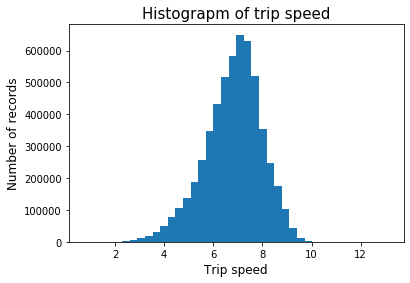

In [24]:
# analysis on new attributes

plt.hist(ndf['trip_speed'],bins =40)
plt.title("Histograpm of trip speed",fontsize=15)                     
                                                                    
plt.xlabel("Trip speed",fontsize=12)
plt.ylabel("Number of records",fontsize=12)

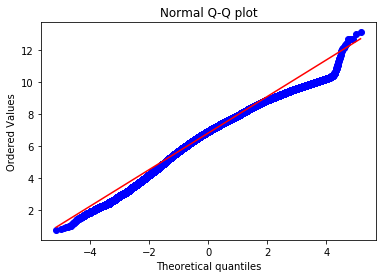

In [25]:
stats.probplot(ndf['trip_speed'], dist="norm", plot=plt)      # assume tip speed is normal distribution
plt.title("Normal Q-Q plot")
plt.show()

Text(0, 0.5, 'Mean value of delay')

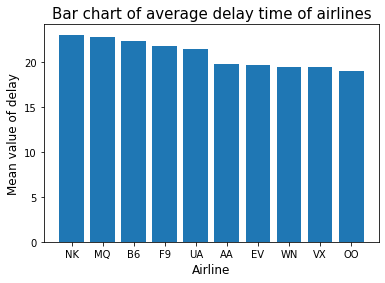

In [26]:
# which airlines is most delayed

s2 = po.groupby('AIRLINE').mean().ARRIVAL_DELAY   
ss = s2.sort_values(ascending=False)
label = list(ss.index)
x = list(ss)

plt.bar(x = label[0:10], height = x[0:10])
plt.title("Bar chart of average delay time of airlines",fontsize=15)     
plt.xlabel("Airline",fontsize=12)
plt.ylabel("Mean value of delay",fontsize=12)

(0, 23)

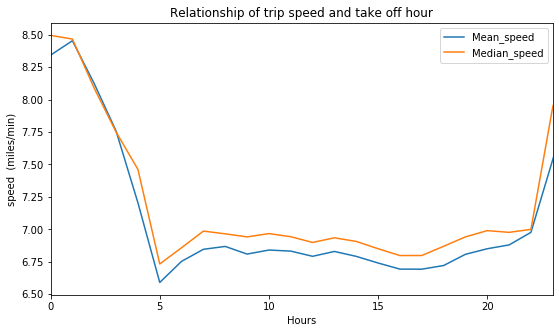

In [27]:
fig,ax = plt.subplots(1,1,figsize=(9,5)) # prepare fig to plot mean and median values
# use a pivot table to aggregate trip_speed by hour
table1 = ndf.pivot_table(index='take_off_hours', values='trip_speed',aggfunc=('mean','median')).reset_index()

# rename columns
table1.columns = ['Hour','Mean_speed','Median_speed']
table1[['Mean_speed','Median_speed']].plot(ax=ax)
plt.ylabel('speed  (miles/min)')
plt.xlabel('Hours')
plt.title('Relationship of trip speed and take off hour')
plt.xlim([0,23])

(0, 23)

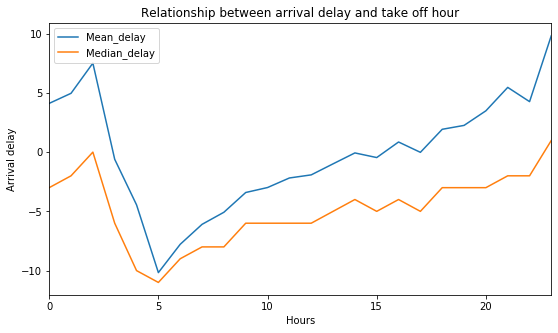

In [28]:
fig,ax = plt.subplots(1,1,figsize=(9,5)) # prepare fig to plot mean and median values
# use a pivot table to aggregate delay by hour
table1 = ndf.pivot_table(index='take_off_hours', values='ARRIVAL_DELAY',aggfunc=('mean','median')).reset_index()

# rename columns
table1.columns = ['Hour','Mean_delay','Median_delay']
table1[['Mean_delay','Median_delay']].plot(ax=ax)
plt.ylabel('Arrival delay')
plt.xlabel('Hours')
plt.title('Relationship between arrival delay and take off hour')
plt.xlim([0,23])

Text(0, 0.5, 'Mean value')

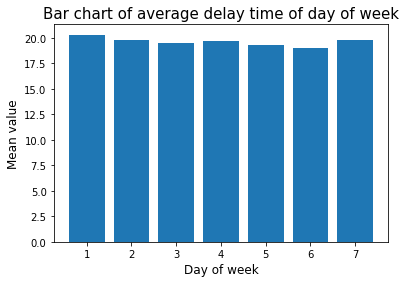

In [29]:
# Does the delay of flight  have anything to do with the day of the week
s2 = po.groupby('DAY_OF_WEEK').mean().ARRIVAL_DELAY  
labels=s2.index
plt.bar(x = labels, height = s2)
plt.title("Bar chart of average delay time of day of week",fontsize=15)     
plt.xlabel("Day of week",fontsize=12)
plt.ylabel("Mean value",fontsize=12)

Text(0, 0.5, 'Mean value')

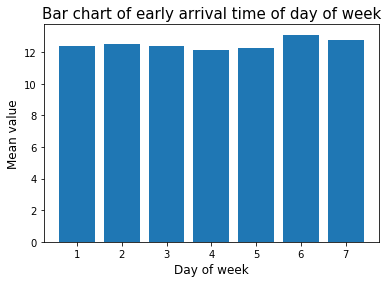

In [30]:
# Does the early arrival of flights have anything to do with the day of the week
s2 = abs(ne.groupby('DAY_OF_WEEK').mean().ARRIVAL_DELAY)  
labels=s2.index
plt.bar(x = labels, height = s2)
plt.title("Bar chart of early arrival time of day of week",fontsize=15)     
plt.xlabel("Day of week",fontsize=12)
plt.ylabel("Mean value",fontsize=12)

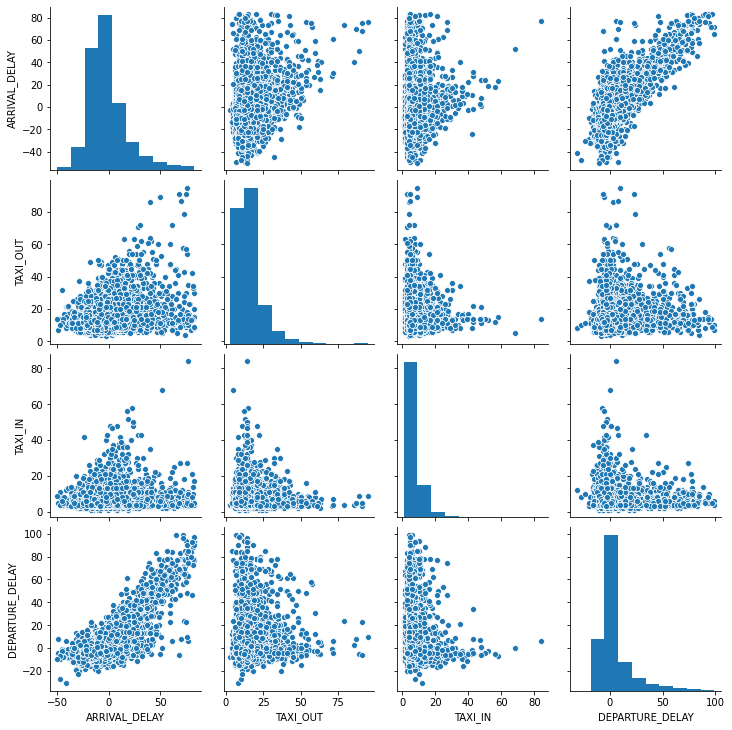

In [11]:
d2 = ndf.loc[:,['ARRIVAL_DELAY','TAXI_OUT','TAXI_IN','DEPARTURE_DELAY']].copy()
df2 = d2.sample(n=5000,random_state=59,axis=0)
sns.pairplot(df2)

Text(0, 0.5, 'Number of records')

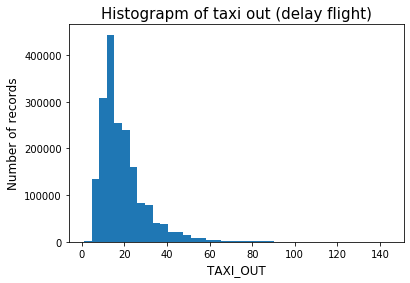

In [32]:
plt.hist(po['TAXI_OUT'],bins =40)
plt.title("Histograpm of taxi out (delay flight)",fontsize=15)    
                                                                     
plt.xlabel('TAXI_OUT',fontsize=12)
plt.ylabel("Number of records",fontsize=12)

Text(0, 0.5, 'Number of records')

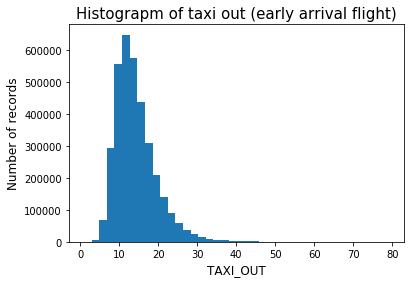

In [33]:
plt.hist(ne['TAXI_OUT'],bins =40)
plt.title("Histograpm of taxi out (early arrival flight)",fontsize=15)    
                                                                     
plt.xlabel('TAXI_OUT',fontsize=12)
plt.ylabel("Number of records",fontsize=12)

## Exploratory data analysis (WN airline)

In [12]:
r = list(ndf[ndf['AIRLINE'] !='WN'].index) 
ndf1 = ndf.drop(index = r).copy()

In [12]:
ndf1

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,trip_speed,take_off_hours,delay
155,2015,1,1,4,WN,SFO,DEN,555,553.0,-2.0,...,132.0,967,916.0,7.0,925,923.0,-2.0,7.325758,6,0
184,2015,1,1,4,WN,BOS,BWI,600,556.0,-4.0,...,63.0,369,716.0,3.0,745,719.0,-26.0,5.857143,6,0
185,2015,1,1,4,WN,LAS,BWI,600,602.0,2.0,...,230.0,2106,1302.0,3.0,1330,1305.0,-25.0,9.156522,6,0
186,2015,1,1,4,WN,ABQ,HOU,600,607.0,7.0,...,103.0,759,919.0,3.0,900,922.0,22.0,7.368932,6,1
187,2015,1,1,4,WN,PHX,SLC,600,601.0,1.0,...,76.0,507,726.0,3.0,735,729.0,-6.0,6.671053,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818908,2015,12,31,4,WN,ATL,OKC,2240,2246.0,6.0,...,119.0,761,2354.0,4.0,5,2358.0,-7.0,6.394958,22,0
5818909,2015,12,31,4,WN,ATL,RIC,2240,2239.0,-1.0,...,62.0,481,5.0,5.0,10,10.0,0.0,7.758065,23,0
5818927,2015,12,31,4,WN,ATL,CAK,2245,2240.0,-5.0,...,73.0,528,5.0,7.0,25,12.0,-13.0,7.232877,22,0
5818928,2015,12,31,4,WN,ATL,PHL,2245,2243.0,-2.0,...,82.0,666,15.0,5.0,45,20.0,-25.0,8.121951,22,0


In [13]:
po = ndf1[ndf1["ARRIVAL_DELAY"]>0].copy() 
ne = ndf1[ndf1["ARRIVAL_DELAY"]<0].copy()

In [37]:
po.describe().ARRIVAL_DELAY    

count    432104.000000
mean         19.456770
std          18.840341
min           1.000000
25%           5.000000
50%          13.000000
75%          28.000000
max          83.000000
Name: ARRIVAL_DELAY, dtype: float64

In [13]:
IQR =  28-5
big = 1.5*IQR+28

In [14]:
r = list(ndf1[ndf1['ARRIVAL_DELAY'] > big].index) 
ndf1 = ndf1.drop(index = r)

Text(0, 0.5, 'Number of records')

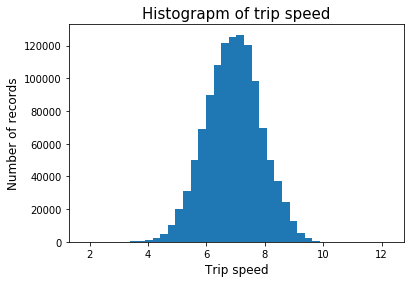

In [40]:
# Check the distribution of WN airline
# still normal distributed

plt.hist(ndf1['trip_speed'],bins =40)
plt.title("Histograpm of trip speed",fontsize=15)     
                                                      
plt.xlabel("Trip speed",fontsize=12)
plt.ylabel("Number of records",fontsize=12)

(0, 23)

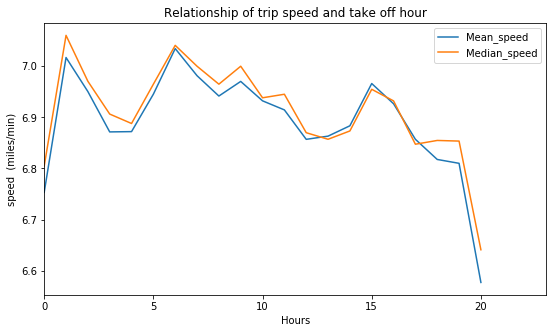

In [41]:
fig,ax = plt.subplots(1,1,figsize=(9,5)) # prepare fig to plot mean and median values
# use a pivot table to aggregate trip_speed by hour
table1 = ndf1.pivot_table(index='take_off_hours', values='trip_speed',aggfunc=('mean','median')).reset_index()

# rename columns
table1.columns = ['Hour','Mean_speed','Median_speed']
table1[['Mean_speed','Median_speed']].plot(ax=ax)
plt.ylabel('speed  (miles/min)')
plt.xlabel('Hours')
plt.title('Relationship of trip speed and take off hour')
plt.xlim([0,23])

(0, 23)

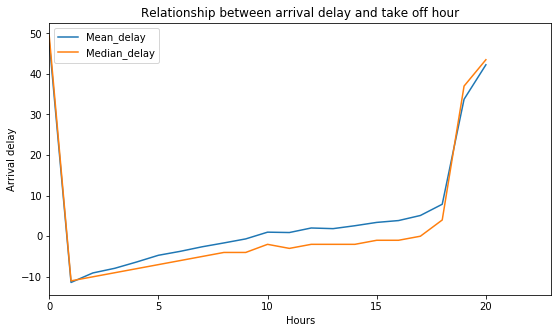

In [42]:
fig,ax = plt.subplots(1,1,figsize=(9,5)) # prepare fig to plot mean and median values
# use a pivot table to aggregate delay by hour
table1 = ndf1.pivot_table(index='take_off_hours', values='ARRIVAL_DELAY',aggfunc=('mean','median')).reset_index()

# rename columns
table1.columns = ['Hour','Mean_delay','Median_delay']
table1[['Mean_delay','Median_delay']].plot(ax=ax)
plt.ylabel('Arrival delay')
plt.xlabel('Hours')
plt.title('Relationship between arrival delay and take off hour')
plt.xlim([0,23])

## Build model (All airlines)

In [15]:
df_all = ndf.sample(n=500000,random_state=59,axis=0)

# classification
y_all = df_all.delay
f_data_all = df_all.loc[:,['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT',
                           'take_off_hours','TAXI_IN','trip_speed','DISTANCE']].copy()

d_train_all,d_test_all,y_train_all,y_test_all = train_test_split(f_data_all,y_all,test_size = 0.3,random_state = 59)

### GNB

In [16]:
gnb = GNB().fit(d_train_all,y_train_all)
gnb.score(d_train_all,y_train_all),gnb.score(d_test_all,y_test_all)

(0.8388714285714286, 0.8394133333333333)

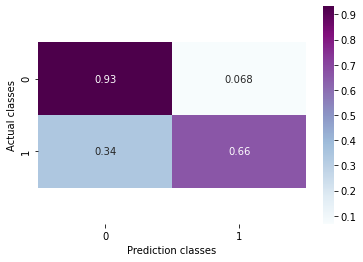

In [17]:
gnbl = gnb.predict(d_test_all)
marix_GNB = confusion_matrix(y_test_all,gnbl)

normed_matrix = normalize(marix_GNB, axis=1, norm='l1') # normalize the matrix
sns.heatmap(normed_matrix, annot = True,xticklabels = ['0','1'],yticklabels = ['0','1'],cmap = 'BuPu')
plt.xlabel('Prediction classes')
plt.ylabel('Actual classes')
b,t = plt.ylim()       # change the height of top and bottom 
b = b+0.5 
t = t-0.5
plt.ylim(b,t)
plt.show()  

### SVM

In [62]:
svc = LinearSVC(random_state=24).fit(d_train_all,y_train_all)
cvscore(svc,d_train_all,y_train_all,cv = 5).mean(),svc.score(d_test_all,y_test_all)

svc1 = svc.predict(d_test_all)
print(classification_report(y_test_all,svc1))



              precision    recall  f1-score   support

           0       0.84      0.96      0.89     98741
           1       0.89      0.65      0.75     51259

    accuracy                           0.85    150000
   macro avg       0.86      0.80      0.82    150000
weighted avg       0.86      0.85      0.84    150000



In [75]:
svc.score(d_train_all,y_train_all),svc.score(d_test_all,y_test_all)

(0.8504428571428572, 0.8512333333333333)

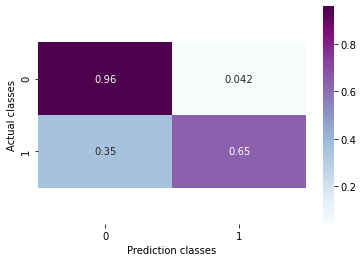

In [76]:
marix_svc = confusion_matrix(y_test_all,svc1)

normed_matrix = normalize(marix_svc, axis=1, norm='l1') # normalize the matrix
sns.heatmap(normed_matrix, annot = True,xticklabels = ['0','1'],yticklabels = ['0','1'],cmap = 'BuPu')
plt.xlabel('Prediction classes')
plt.ylabel('Actual classes')
b,t = plt.ylim()       # change the height of top and bottom 
b = b+0.5 
t = t-0.5
plt.ylim(b,t)
plt.show()  

### Linear model（predicting how long was the arrival delay)

In [68]:
dfL_all = df_all.loc[:,['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','DISTANCE',
                'TAXI_IN','trip_speed','take_off_hours']].copy()

yL_all = df_all.ARRIVAL_DELAY

dL_train_all,dL_test_all,yL_train_all,yL_test_all = train_test_split(dfL_all,yL_all,
                                                                     test_size = 0.3,random_state = 62)


## R check model assumptions 

In [69]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(dL_train_all,yL_train_all)
print(lreg)

y_pred_lreg = lreg.predict(dL_test_all)
y_train_lreg = lreg.predict(dL_train_all)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics testing')
print('R^2=',metrics.explained_variance_score(yL_test_all,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(yL_test_all,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(yL_test_all,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(yL_test_all,y_pred_lreg)))

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics training')
print('R^2=',metrics.explained_variance_score(yL_train_all,y_train_lreg))
print('MAE:',metrics.mean_absolute_error(yL_train_all,y_train_lreg))
print('MSE:',metrics.mean_squared_error(yL_train_all,y_train_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(yL_train_all,y_train_lreg)))

LinearRegression()

Linear Regression Performance Metrics testing
R^2= 0.7899928617461238
MAE: 6.947897606336824
MSE: 83.91563430945823
RMSE: 9.160547707940733

Linear Regression Performance Metrics training
R^2= 0.79165473574936
MAE: 6.927240262006633
MSE: 83.38815908482779
RMSE: 9.131711728084051


## R do the stepwise selection 

LinearRegression()

Linear Regression Performance Metrics testing
R^2= 0.789994105318814
MAE: 6.947759999778298
MSE: 83.91513720844404
RMSE: 9.160520575188073

Linear Regression Performance Metrics training
R^2= 0.7916546439341754
MAE: 6.927130192663828
MSE: 83.38819583295952
RMSE: 9.131713740200112


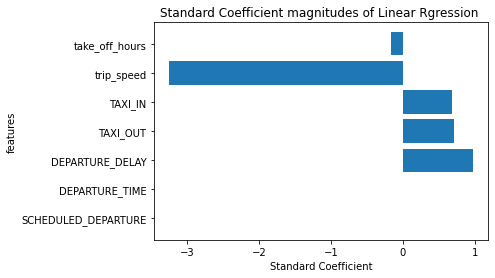

,Features,Standard Coefficient
0,SCHEDULED_DEPARTURE,0.000949
1,DEPARTURE_TIME,0.000758
2,DEPARTURE_DELAY,0.973791
3,TAXI_OUT,0.705978
4,TAXI_IN,0.680340
5,trip_speed,-3.249877
6,take_off_hours,-0.160632


In [71]:
dfL_all2 = df_all.loc[:,['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT',
                'TAXI_IN','trip_speed','take_off_hours']].copy()

#yL_all = df_all.ARRIVAL_DELAY

dL_train_all2,dL_test_all2,yL_train_all2,yL_test_all2 = train_test_split(dfL_all2,yL_all,
                                                                     test_size = 0.3,random_state = 62)


lreg = LinearRegression()
lreg.fit(dL_train_all2,yL_train_all2)
print(lreg)

y_pred_lreg = lreg.predict(dL_test_all2)
y_train_lreg = lreg.predict(dL_train_all2)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics testing')
print('R^2=',metrics.explained_variance_score(yL_test_all2,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(yL_test_all2,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(yL_test_all2,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(yL_test_all2,y_pred_lreg)))

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics training')
print('R^2=',metrics.explained_variance_score(yL_train_all2,y_train_lreg))
print('MAE:',metrics.mean_absolute_error(yL_train_all2,y_train_lreg))
print('MSE:',metrics.mean_squared_error(yL_train_all2,y_train_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(yL_train_all2,y_train_lreg)))



# feature importance 

import scipy.stats as stats
import statsmodels.api as sm

cols = list(dfL_all2.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = dfL_all2[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(yL_all,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
#print('selected features after stepwise selection: ',selected_features_BE)



# Standard Coefficient plot

coef_dict_baseline = {}
for coef, feat in zip(lreg.coef_,dfL_all2.columns):
    coef_dict_baseline[feat] = coef



names = list(coef_dict_baseline.keys())
values = list(coef_dict_baseline.values())

#tick_label does the some work as plt.xticks()
plt.barh(range(len(coef_dict_baseline)),values,tick_label=names)


plt.xlabel('Standard Coefficient')
plt.ylabel('features')
plt.title('Standard Coefficient magnitudes of Linear Rgression ')
plt.show()





# Standard Coefficient values
sd_coef = pd.DataFrame()
name = list(coef_dict_baseline.keys())
values = list(coef_dict_baseline.values())
sd_coef['Features'] = name
sd_coef['Standard Coefficient'] = values
sd_coef

## drop insignicant features

In [72]:

df_all_L2 = df_all.loc[:,['DEPARTURE_DELAY','TAXI_OUT', 'trip_speed',"take_off_hours",
                          'TAXI_IN']].copy()
y_L = df_all.ARRIVAL_DELAY


dL_train_all2,dL_test_all2,yL_train_all2,yL_test_all2 = train_test_split(df_all_L2,y_L,
                                                                     test_size = 0.3,random_state = 62)



# after feature  selection 


lreg = LinearRegression()
lreg.fit(dL_train_all2,yL_train_all2)
print(lreg)

y_pred_lreg = lreg.predict(dL_test_all2)
y_train_lreg = lreg.predict(dL_train_all2)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics testing')
print('R^2=',metrics.explained_variance_score(yL_test_all2,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(yL_test_all2,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(yL_test_all2,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(yL_test_all2,y_pred_lreg)))

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics training')
print('R^2=',metrics.explained_variance_score(yL_train_all2,y_train_lreg))
print('MAE:',metrics.mean_absolute_error(yL_train_all2,y_train_lreg))
print('MSE:',metrics.mean_squared_error(yL_train_all2,y_train_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(yL_train_all2,y_train_lreg)))




LinearRegression()

Linear Regression Performance Metrics testing
R^2= 0.7898417992072815
MAE: 6.94964256137041
MSE: 83.97597858245004
RMSE: 9.16384082044478

Linear Regression Performance Metrics training
R^2= 0.7915561267670121
MAE: 6.928386736112881
MSE: 83.4276263678341
RMSE: 9.133872473810552


## Build model (WN and DL airlines)

### WN airline

In [59]:
# all
#df_wn = ndf1.loc[:,['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','DISTANCE',
#                 'TAXI_IN','trip_speed','take_off_hours']].copy()
#y_wn = ndf1.delay
#d_train,d_test,y_train,y_test = train_test_split(df_wn,y_wn,test_size = 0.3,random_state = 42)

In [18]:
# part

df_wn = ndf1.sample(n=500000,random_state=59,axis=0)
y_wn = df_wn.delay
f_data2 = df_wn.loc[:,['SCHEDULED_DEPARTURE','DEPARTURE_DELAY','TAXI_OUT','DISTANCE',
                    'TAXI_IN','trip_speed','take_off_hours','DEPARTURE_TIME']].copy()

d_train2,d_test2,y_train2,y_test2 = train_test_split(f_data2,y_wn,test_size = 0.3,random_state = 42)


#### GNB

0.8515542857142857 0.8500666666666666


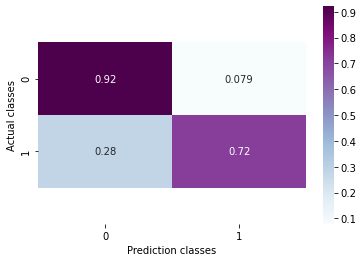

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     97569
           1       0.83      0.72      0.77     52431

    accuracy                           0.85    150000
   macro avg       0.84      0.82      0.83    150000
weighted avg       0.85      0.85      0.85    150000



In [19]:
gnb = GNB().fit(d_train2,y_train2)
print(gnb.score(d_train2,y_train2),gnb.score(d_test2,y_test2))

gnbl = gnb.predict(d_test2)
marix_GNB = confusion_matrix(y_test2,gnbl)

normed_matrix = normalize(marix_GNB, axis=1, norm='l1') # normalize the matrix
sns.heatmap(normed_matrix, annot = True,xticklabels = ['0','1'],yticklabels = ['0','1'],cmap = 'BuPu')
plt.xlabel('Prediction classes')
plt.ylabel('Actual classes')
b,t = plt.ylim()       # change the height of top and bottom 
b = b+0.5 
t = t-0.5

plt.ylim(b,t)
plt.show()  

print(classification_report(y_test2,gnbl))

#### SVM

0.86998 0.8696666666666667
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     97569
           1       0.86      0.74      0.80     52431

    accuracy                           0.87    150000
   macro avg       0.87      0.84      0.85    150000
weighted avg       0.87      0.87      0.87    150000



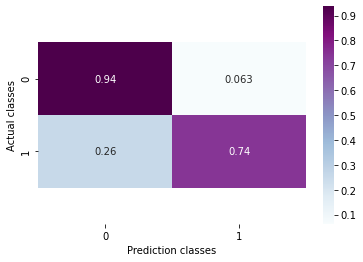

In [79]:
svc = LinearSVC(random_state=24).fit(d_train2,y_train2)
cvscore(svc,d_train2,y_train2,cv = 5).mean(),svc.score(d_test2,y_test2)
svc1 = svc.predict(d_test2)
print(svc.score(d_train2,y_train2),svc.score(d_test2,y_test2))

print(classification_report(y_test2,svc1))

marix_svc = confusion_matrix(y_test2,svc1)

normed_matrix = normalize(marix_svc, axis=1, norm='l1') # normalize the matrix
sns.heatmap(normed_matrix, annot = True,xticklabels = ['0','1'],yticklabels = ['0','1'],cmap = 'BuPu')
plt.xlabel('Prediction classes')
plt.ylabel('Actual classes')
b,t = plt.ylim()     # change the height of top and bottom 
b = b+0.5 
t = t-0.5
plt.ylim(b,t)
plt.show()

In [ ]:
# plot learning curve

train_size = np.linspace(0.1,1,10)

train_sizes, learn_train, learn_test = learning_curve(
     LinearSVC(), d_train2, y_train2, train_sizes=train_size, cv=5, n_jobs=-1, verbose=10)


mean_learn_train = np.mean(learn_train, axis = 1)
std_learn_train = np.std(learn_train, axis = 1)

mean_learn_test = np.mean(learn_test , axis = 1)
std_learn_test = np.std(learn_test, axis = 1)



plt.plot(train_size, mean_learn_train, label='learn score', color = 'r')
plt.fill_between(train_size, mean_learn_train-std_learn_train, mean_learn_train+std_learn_train, alpha=0.2, color='r')

plt.plot(train_size, mean_learn_test, label='test score', color = 'g')
plt.fill_between(train_size, mean_learn_test-std_learn_test, mean_learn_test+std_learn_test, alpha=0.2, color='g')

idx_test_max = np.argmax(mean_learn_test)
idx_train_max = np.argmax(mean_learn_train)

plt.scatter(train_size[idx_test_max], mean_learn_test[idx_test_max],
            label='Test_Max_Acc: ${:.2f}\pm{:.5f}$'.format(
                mean_learn_test[idx_test_max], std_learn_test[idx_test_max]))

plt.scatter(train_size[idx_train_max], mean_learn_train[idx_train_max],
            label='Train_Max_Acc: ${:.2f}\pm{:.5f}$'.format(
                mean_learn_train[idx_train_max], std_learn_train[idx_train_max]))



plt.legend(loc='best',fontsize = 8)

plt.title('learning curve for LinearSVM')
plt.xlabel('size of training data')
plt.ylabel('accuracy')
plt.show()

## feature selection

In [20]:
# svm-feature selection
#df = ndf.sample(n=500000,random_state=59,axis=0)
df_wn_class_aft = df_wn.loc[:,['DEPARTURE_DELAY','TAXI_OUT','TAXI_IN',
                               'take_off_hours','trip_speed','DISTANCE']].copy()
#y = df.delay
d_train5,d_test5,y_train5,y_test5 = train_test_split(df_wn_class_aft,y_wn,test_size = 0.3,random_state = 42)

## GNB

0.8534342857142857 0.8526866666666667


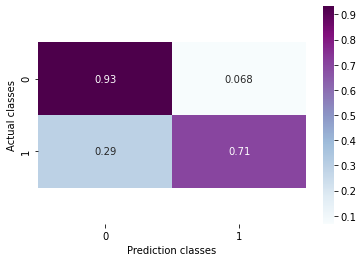

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     97569
           1       0.85      0.71      0.77     52431

    accuracy                           0.85    150000
   macro avg       0.85      0.82      0.83    150000
weighted avg       0.85      0.85      0.85    150000



In [21]:
gnb = GNB().fit(d_train5,y_train5)
print(gnb.score(d_train5,y_train5),gnb.score(d_test5,y_test5))

gnbl3 = gnb.predict(d_test5)
marix_GNB = confusion_matrix(y_test5,gnbl3)

normed_matrix = normalize(marix_GNB, axis=1, norm='l1') # normalize the matrix
sns.heatmap(normed_matrix, annot = True,xticklabels = ['0','1'],yticklabels = ['0','1'],cmap = 'BuPu')
plt.xlabel('Prediction classes')
plt.ylabel('Actual classes')
b,t = plt.ylim()       # change the height of top and bottom 
b = b+0.5 
t = t-0.5
plt.ylim(b,t)
plt.show()  

print(classification_report(y_test5,gnbl3))

## SVM

0.8716514285714285 0.8713933333333334
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     97569
           1       0.89      0.73      0.80     52431

    accuracy                           0.87    150000
   macro avg       0.88      0.84      0.85    150000
weighted avg       0.87      0.87      0.87    150000



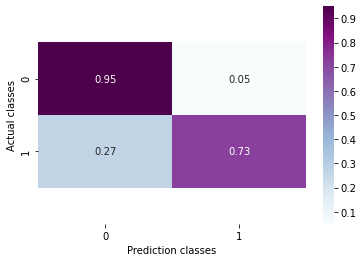

In [82]:
# 500000
svc5 = LinearSVC(random_state = 24).fit(d_train5,y_train5)
cvscore(svc5,d_train5,y_train5,cv = 5).mean(),svc5.score(d_test5,y_test5)
svc15 = svc5.predict(d_test5)

print(svc5.score(d_train5,y_train5),svc5.score(d_test5,y_test5))
print(classification_report(y_tests5,svc15))


marix_svc = confusion_matrix(y_test5,svc15)

normed_matrix = normalize(marix_svc, axis=1, norm='l1') # normalize the matrix
sns.heatmap(normed_matrix, annot = True,xticklabels = ['0','1'],yticklabels = ['0','1'],cmap = 'BuPu')
plt.xlabel('Prediction classes')
plt.ylabel('Actual classes')
b,t = plt.ylim()       # change the height of top and bottom 
b = b+0.5 
t = t-0.5
plt.ylim(b,t)
plt.show()  

## Linear

In [56]:
df_wn_L = df_wn.loc[:,['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','DISTANCE',
                'TAXI_IN','trip_speed','take_off_hours']].copy()
# time predict
y_wn_L = df_wn.ARRIVAL_DELAY
d_train2,d_test2,y_train2,y_test2 = train_test_split(df_wn_L,y_wn_L,test_size = 0.3,random_state = 62)

In [57]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(d_train2,y_train2)
print(lreg)

y_pred_lreg = lreg.predict(d_test2)
y_train_lreg = lreg.predict(d_train2)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics testing')
print('R^2=',metrics.explained_variance_score(y_test2,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(y_test2,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(y_test2,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test2,y_pred_lreg)))

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics training')
print('R^2=',metrics.explained_variance_score(y_train2,y_train_lreg))
print('MAE:',metrics.mean_absolute_error(y_train2,y_train_lreg))
print('MSE:',metrics.mean_squared_error(y_train2,y_train_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train2,y_train_lreg)))

LinearRegression()

Linear Regression Performance Metrics testing
R^2= 0.7949881678457444
MAE: 5.765433520209717
MSE: 59.608310834009025
RMSE: 7.72064186671089

Linear Regression Performance Metrics training
R^2= 0.7923335378770346
MAE: 5.796237260228477
MSE: 60.43795042445504
RMSE: 7.774184872027101


In [38]:
# learning curve 


## R do stepwise selection 

## after stepwise selection 

LinearRegression()

Linear Regression Performance Metrics testing
R^2= 0.7949846849363086
MAE: 5.765489977569195
MSE: 59.60932100917394
RMSE: 7.720707286847102

Linear Regression Performance Metrics training
R^2= 0.7923315239708318
MAE: 5.796296587348595
MSE: 60.438536539141076
RMSE: 7.774222568150534


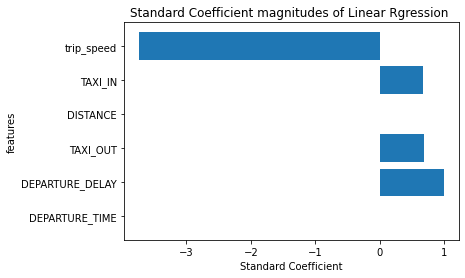

In [59]:
# after stpewise selection 


df_wn_L2 = df_wn.loc[:,['DEPARTURE_TIME', 
                           'DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'TAXI_IN', 
                           'trip_speed']].copy()

d_train4,d_test4,y_train4,y_test4 = train_test_split(df_wn_L2,y_wn_L,test_size = 0.3,random_state = 62)


lreg = LinearRegression()
lreg.fit(d_train4,y_train4)
print(lreg)

y_pred_lreg = lreg.predict(d_test4)
y_train_lreg = lreg.predict(d_train4)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics testing')
print('R^2=',metrics.explained_variance_score(y_test4,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(y_test4,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(y_test4,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test4,y_pred_lreg)))

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics training')
print('R^2=',metrics.explained_variance_score(y_train4,y_train_lreg))
print('MAE:',metrics.mean_absolute_error(y_train4,y_train_lreg))
print('MSE:',metrics.mean_squared_error(y_train4,y_train_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train4,y_train_lreg)))




import scipy.stats as stats
import statsmodels.api as sm

cols = list(df_wn_L2.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = df_wn_L2[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_wn_L,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
#print('selected features after stepwise selection: ',selected_features_BE)



# Standard Coefficient plot

coef_dict_baseline = {}
for coef, feat in zip(lreg.coef_,df_wn_L2.columns):
    coef_dict_baseline[feat] = coef



names = list(coef_dict_baseline.keys())
values = list(coef_dict_baseline.values())

#tick_label does the some work as plt.xticks()
plt.barh(range(len(coef_dict_baseline)),values,tick_label=names)


plt.xlabel('Standard Coefficient')
plt.ylabel('features')
plt.title('Standard Coefficient magnitudes of Linear Rgression ')
plt.show()

## drop insignicant features 

In [60]:
df_wn_L3 = df_wn.loc[:,['DEPARTURE_DELAY', 'TAXI_OUT', 'TAXI_IN', 'trip_speed']].copy()

d_trainL3,d_testL3,y_trainL3,y_testL3 = train_test_split(df_wn_L3,y_wn_L,test_size = 0.3,random_state = 62)


lreg = LinearRegression()
lreg.fit(d_trainL3,y_trainL3)
print(lreg)

y_pred_lreg = lreg.predict(d_testL3)
y_train_lreg = lreg.predict(d_trainL3)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics testing')
print('R^2=',metrics.explained_variance_score(y_testL3,y_pred_lreg))
print('MAE:',metrics.mean_absolute_error(y_testL3,y_pred_lreg))
print('MSE:',metrics.mean_squared_error(y_testL3,y_pred_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_testL3,y_pred_lreg)))

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics training')
print('R^2=',metrics.explained_variance_score(y_trainL3,y_train_lreg))
print('MAE:',metrics.mean_absolute_error(y_trainL3,y_train_lreg))
print('MSE:',metrics.mean_squared_error(y_trainL3,y_train_lreg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_trainL3,y_train_lreg)))


LinearRegression()

Linear Regression Performance Metrics testing
R^2= 0.7937868752076699
MAE: 5.792525143607258
MSE: 59.95757052762677
RMSE: 7.743227397385845

Linear Regression Performance Metrics training
R^2= 0.7911442107097896
MAE: 5.823583514537615
MSE: 60.784084776808236
RMSE: 7.796414866899288


### DL airline

#### GNB

In [43]:
r = list(ndf[ndf['AIRLINE'] !='DL'].index) 
ndf_DL = ndf.drop(index = r).copy()
ndf_DL

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,trip_speed,take_off_hours,delay
5,2015,1,1,4,DL,SFO,MSP,25,20.0,-5.0,...,206.0,1589,604.0,6.0,602,610.0,8.0,7.713592,0,1
9,2015,1,1,4,DL,LAS,ATL,30,33.0,3.0,...,186.0,1747,651.0,5.0,711,656.0,-15.0,9.392473,0,0
10,2015,1,1,4,DL,DEN,ATL,30,24.0,-6.0,...,133.0,1199,449.0,4.0,523,453.0,-30.0,9.015038,0,0
12,2015,1,1,4,DL,LAX,MSP,35,35.0,0.0,...,188.0,1535,601.0,4.0,609,605.0,-4.0,8.164894,0,0
13,2015,1,1,4,DL,SLC,ATL,40,34.0,-6.0,...,176.0,1590,548.0,5.0,615,553.0,-22.0,9.034091,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819027,2015,12,31,4,DL,SLC,JFK,2345,2344.0,-1.0,...,217.0,1990,536.0,6.0,606,542.0,-24.0,9.170507,23,0
5819032,2015,12,31,4,DL,HNL,PDX,2350,2350.0,0.0,...,285.0,2603,656.0,19.0,731,715.0,-16.0,9.133333,0,0
5819033,2015,12,31,4,DL,LAX,ATL,2350,16.0,26.0,...,203.0,1947,658.0,7.0,654,705.0,11.0,9.591133,0,1
5819042,2015,12,31,4,DL,PDX,ATL,2355,2349.0,-6.0,...,242.0,2172,700.0,4.0,719,704.0,-15.0,8.975207,23,0


In [44]:
# all
#df = ndf2.loc[:,['SCHEDULED_DEPARTURE','DEPARTURE_DELAY','TAXI_OUT','DISTANCE','TAXI_IN','trip_speed','take_off_hours']].copy()
#y = ndf2.delay
#d_train,d_test,y_train,y_test = train_test_split(df,y,test_size = 0.3,random_state = 42)

In [45]:
df2 = ndf_DL.sample(n=500000,random_state=59,axis=0)
y2DL = df2.delay


f_data2 = df2.loc[:,['SCHEDULED_DEPARTURE','DEPARTURE_DELAY','DEPARTURE_TIME',
                    'TAXI_OUT','DISTANCE','TAXI_IN','trip_speed','take_off_hours']].copy()

dDL_train,dDL_test,yDL_train,yDL_test = train_test_split(f_data2,y2DL,test_size = 0.3,random_state = 42)



0.8583714285714286 0.8575066666666666


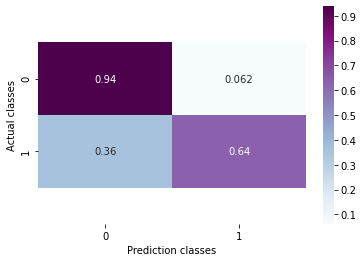

              precision    recall  f1-score   support

           0       0.88      0.94      0.91    109732
           1       0.79      0.64      0.71     40268

    accuracy                           0.86    150000
   macro avg       0.83      0.79      0.81    150000
weighted avg       0.85      0.86      0.85    150000



In [46]:
gnb = GNB().fit(dDL_train,yDL_train)
print(gnb.score(dDL_train,yDL_train),gnb.score(dDL_test,yDL_test))

gnb_DL1 = gnb.predict(dDL_test)
marix_GNB = confusion_matrix(yDL_test,gnb_DL1)

normed_matrix = normalize(marix_GNB, axis=1, norm='l1') # normalize the matrix
sns.heatmap(normed_matrix, annot = True,xticklabels = ['0','1'],yticklabels = ['0','1'],cmap = 'BuPu')
plt.xlabel('Prediction classes')
plt.ylabel('Actual classes')
b,t = plt.ylim()       # change the height of top and bottom 
b = b+0.5 
t = t-0.5
plt.ylim(b,t)
plt.show()  

print(classification_report(yDL_test,gnb_DL1))

## SVM

              precision    recall  f1-score   support

           0       0.91      0.91      0.91    109732
           1       0.75      0.76      0.75     40268

    accuracy                           0.87    150000
   macro avg       0.83      0.83      0.83    150000
weighted avg       0.87      0.87      0.87    150000



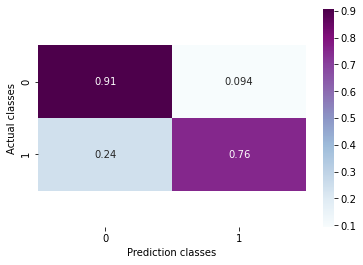

In [83]:
svc = LinearSVC(random_state=24).fit(dDL_train,yDL_train)

svc_DL1 = svc.predict(dDL_test)

print(svc.score(dDL_train,yDL_train),svc.score(dDL_test,yDL_test))
print(classification_report(yDL_test,svc_DL1))


marix_svc = confusion_matrix(yDL_test,svc_DL1)

normed_matrix = normalize(marix_svc, axis=1, norm='l1') # normalize the matrix
sns.heatmap(normed_matrix, annot = True,xticklabels = ['0','1'],yticklabels = ['0','1'],cmap = 'BuPu')
plt.xlabel('Prediction classes')
plt.ylabel('Actual classes')
b,t = plt.ylim()       # change the height of top and bottom 
b = b+0.5 
t = t-0.5
plt.ylim(b,t)
plt.show()

0.86998 0.8696666666666667
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     97569
           1       0.86      0.74      0.80     52431

    accuracy                           0.87    150000
   macro avg       0.87      0.84      0.85    150000
weighted avg       0.87      0.87      0.87    150000



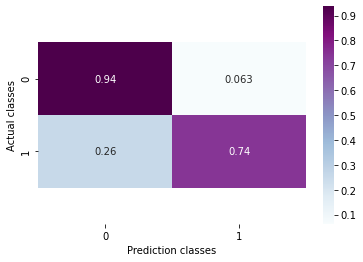

0.8320714285714285 0.2684533333333333


## Feature selction

In [92]:
f_data_DL2 = df2.loc[:,['DEPARTURE_DELAY','TAXI_OUT','DISTANCE','TAXI_IN','trip_speed','take_off_hours']].copy()
d_train_DL2,d_test_DL2,y_train_DL2,y_test_DL2 = train_test_split(f_data_DL2,y2DL,test_size = 0.3,random_state = 59)

## GNB

0.85912 0.8587933333333333


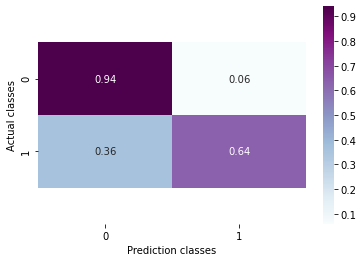

              precision    recall  f1-score   support

           0       0.88      0.94      0.91    109663
           1       0.80      0.64      0.71     40337

    accuracy                           0.86    150000
   macro avg       0.84      0.79      0.81    150000
weighted avg       0.85      0.86      0.85    150000



In [93]:
gnb = GNB().fit(d_train_DL2,y_train_DL2)
print(gnb.score(d_train_DL2,y_train_DL2),gnb.score(d_test_DL2,y_test_DL2))

gnb_DL2 = gnb.predict(d_test_DL2)
marix_GNB = confusion_matrix(y_test_DL2,gnb_DL2)

normed_matrix = normalize(marix_GNB, axis=1, norm='l1') # normalize the matrix
sns.heatmap(normed_matrix, annot = True,xticklabels = ['0','1'],yticklabels = ['0','1'],cmap = 'BuPu')
plt.xlabel('Prediction classes')
plt.ylabel('Actual classes')
b,t = plt.ylim()       # change the height of top and bottom 

b = b+0.5 
t = t-0.5
plt.ylim(b,t)
plt.show()  

print(classification_report(y_test_DL2,gnb_DL2))

## SVM

0.7613 0.3478
              precision    recall  f1-score   support

           0       0.99      0.11      0.20    109663
           1       0.29      1.00      0.45     40337

    accuracy                           0.35    150000
   macro avg       0.64      0.55      0.32    150000
weighted avg       0.80      0.35      0.26    150000



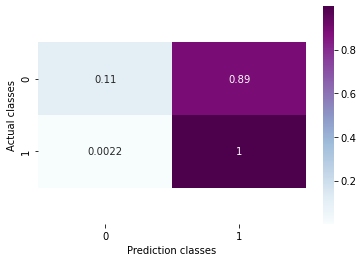

In [95]:
svc = LinearSVC(random_state=24).fit(d_train_DL2,y_train_DL2)
print(cvscore(svc,d_train_DL2,y_train_DL2,cv = 5).mean(),svc.score(d_test_DL2,y_test_DL2))

svc_DL2 = svc.predict(d_test_DL2)
print(classification_report(y_test_DL2,svc_DL2))


marix_svc = confusion_matrix(y_test_DL2,svc_DL2)


normed_matrix = normalize(marix_svc, axis=1, norm='l1') # normalize the matrix
sns.heatmap(normed_matrix, annot = True,xticklabels = ['0','1'],yticklabels = ['0','1'],cmap = 'BuPu')
plt.xlabel('Prediction classes')
plt.ylabel('Actual classes')
b,t = plt.ylim()       # change the height of top and bottom 
b = b+0.5 
t = t-0.5
plt.ylim(b,t)
plt.show() 

## Linear

In [50]:
df_linear = ndf_DL.loc[:,['SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','DISTANCE',
                'TAXI_IN','trip_speed','take_off_hours']].copy()

y_linear = ndf_DL.ARRIVAL_DELAY
d_trainL,d_testL,y_trainL,y_testL = train_test_split(df_linear,y_linear,test_size = 0.3,random_state = 62)

In [51]:
from sklearn.linear_model import LinearRegression

lreg_DL = LinearRegression()
lreg_DL.fit(d_trainL,y_trainL)
print(lreg_DL)

y_pred_lreg_DL = lreg_DL.predict(d_testL)
y_train_lreg_DL = lreg_DL.predict(d_trainL)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics testing')
print('R^2=',metrics.explained_variance_score(y_testL,y_pred_lreg_DL))
print('MAE:',metrics.mean_absolute_error(y_testL,y_pred_lreg_DL))
print('MSE:',metrics.mean_squared_error(y_testL,y_pred_lreg_DL))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_testL,y_pred_lreg_DL)))

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics training')
print('R^2=',metrics.explained_variance_score(y_trainL,y_train_lreg_DL))
print('MAE:',metrics.mean_absolute_error(y_trainL,y_train_lreg_DL))
print('MSE:',metrics.mean_squared_error(y_trainL,y_train_lreg_DL))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_trainL,y_train_lreg_DL)))

LinearRegression()

Linear Regression Performance Metrics testing
R^2= 0.7523304374942251
MAE: 6.684649696851488
MSE: 80.47237610760074
RMSE: 8.970639671037999

Linear Regression Performance Metrics training
R^2= 0.7497015570606265
MAE: 6.716659727323046
MSE: 81.37128613550539
RMSE: 9.020603424134407


## stepwise selection lm did not remove features


## feautre importance 

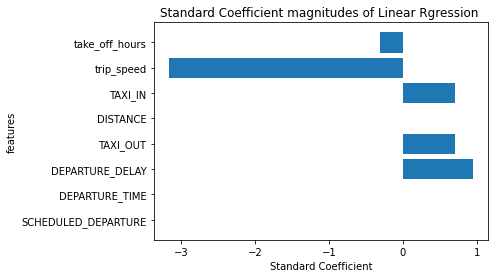

In [61]:
import scipy.stats as stats
import statsmodels.api as sm

cols = list(df_linear.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = df_linear[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_linear,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
#print('selected features after stepwise selection: ',selected_features_BE)



# Standard Coefficient plot

coef_dict_baseline = {}
for coef, feat in zip(lreg_DL.coef_,df_linear.columns):
    coef_dict_baseline[feat] = coef



names = list(coef_dict_baseline.keys())
values = list(coef_dict_baseline.values())

#tick_label does the some work as plt.xticks()
plt.barh(range(len(coef_dict_baseline)),values,tick_label=names)


plt.xlabel('Standard Coefficient')
plt.ylabel('features')
plt.title('Standard Coefficient magnitudes of Linear Rgression ')
plt.show()

# drop insignificant features

In [54]:
df_linear2 = ndf_DL.loc[:,['DEPARTURE_DELAY','TAXI_OUT',
                'TAXI_IN','trip_speed','take_off_hours']].copy()
y_linear2 = ndf_DL.ARRIVAL_DELAY

d_trainL2,d_testL2,y_trainL2,y_testL2 = train_test_split(df_linear2,y_linear2,test_size = 0.3,random_state = 62)




lreg_DL2 = LinearRegression()
lreg_DL2.fit(d_trainL2,y_trainL2)
print(lreg_DL2)

y_pred_lreg_DL2 = lreg_DL2.predict(d_testL2)
y_train_lreg_DL2 = lreg_DL2.predict(d_trainL2)

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics testing')
print('R^2=',metrics.explained_variance_score(y_testL2,y_pred_lreg_DL2))
print('MAE:',metrics.mean_absolute_error(y_testL2,y_pred_lreg_DL2))
print('MSE:',metrics.mean_squared_error(y_testL2,y_pred_lreg_DL2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_testL2,y_pred_lreg_DL2)))

# Score It
from sklearn import metrics
print('\nLinear Regression Performance Metrics training')
print('R^2=',metrics.explained_variance_score(y_trainL2,y_train_lreg_DL2))
print('MAE:',metrics.mean_absolute_error(y_trainL2,y_train_lreg_DL2))
print('MSE:',metrics.mean_squared_error(y_trainL2,y_train_lreg_DL2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_trainL2,y_train_lreg_DL2)))

LinearRegression()

Linear Regression Performance Metrics testing
R^2= 0.7521244633329872
MAE: 6.683169874609952
MSE: 80.53926147664625
RMSE: 8.97436691230341

Linear Regression Performance Metrics training
R^2= 0.7495200198856715
MAE: 6.715133154728771
MSE: 81.43030333606809
RMSE: 9.023874075809575
